In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [13]:
data_1 = make_blobs(n_samples=200, n_features=2, centers=[[2,3], [4,7]])

In [14]:
X = data_1[0]
y = data_1[1]

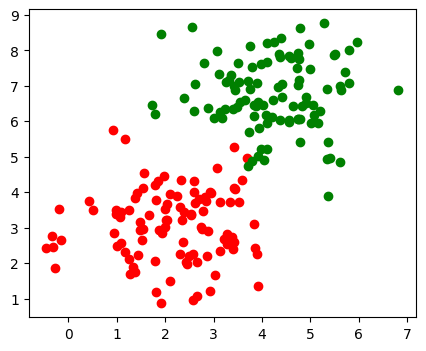

In [15]:
%matplotlib inline 
plt.figure(figsize=(5,4))
plt.scatter(X[y==0, 0], X[y==0, 1], color = "red")
plt.scatter(X[y==1, 0], X[y==1, 1], color = "green")
plt.show()

In [16]:
svm1 = SVC(kernel="linear")

In [17]:
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(X, y, train_size=0.75, random_state=43)

In [18]:
svm1.fit(X_tr1, y_tr1)

SVC(kernel='linear')

In [19]:
y_pred1 = svm1.predict(X_te1)
y_pred1

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0])

In [20]:
print("Testing Accuracy = {}".format(accuracy_score(y_te1, y_pred1)))

Testing Accuracy = 0.98


In [21]:
print("Training Accuracy = {}".format(svm1.score(X_tr1, y_tr1)))

Training Accuracy = 0.9933333333333333


In [22]:
data_2 = make_circles(n_samples=200, noise=0.05, factor=0.4)

In [23]:
X = data_2[0]
y = data_2[1]

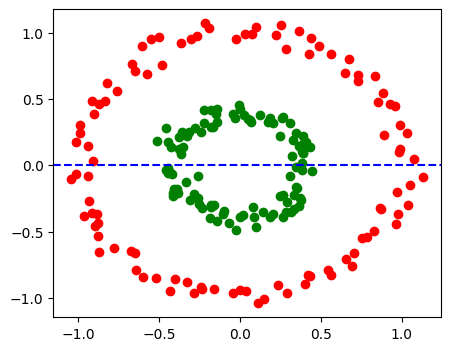

In [24]:
%matplotlib inline 
plt.figure(figsize=(5,4))
plt.axhline(y=0, color="blue", linestyle="--")
plt.scatter(X[y==0, 0], X[y==0, 1], color = "red")
plt.scatter(X[y==1, 0], X[y==1, 1], color = "green")
plt.show()

In [25]:
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(X, y, train_size=0.75, random_state=43)

In [26]:
svm2 = SVC(kernel="linear")

In [27]:
svm2.fit(X_tr2, y_tr2)

SVC(kernel='linear')

In [28]:
print("Training Accuracy = {}".format(svm2.score(X_tr2, y_tr2)))

Training Accuracy = 0.6


In [29]:
y_pred2 = svm2.predict(X_te2)
y_pred2

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
print("Testing Accuracy = {}".format(accuracy_score(y_te2, y_pred2)))

Testing Accuracy = 0.54


In [31]:
df = pd.DataFrame(X, columns=["X1","X2"])
df["y"] = y
df.head()

,X1,X2,y
0,-0.445835,0.173616,1
1,-0.390723,-0.175838,1
2,-0.913007,0.488218,0
3,0.361866,-0.303949,1
4,0.069068,0.327083,1


In [32]:
X1_sq = df["X1"]**2

In [33]:
X2_sq = df["X2"]**2

In [34]:
X1xX2 = df["X1"] * df["X2"]

In [38]:
df["X1_sq"] = X1_sq
df["X2_sq"] = X2_sq
df["X1xX2"] = X1xX2
df.head()

,X1,X2,y,X1_sq,X2_sq,X1xX2
0,-0.445835,0.173616,1,0.198769,0.030142,-0.077404
1,-0.390723,-0.175838,1,0.152664,0.030919,0.068704
2,-0.913007,0.488218,0,0.833582,0.238357,-0.445747
3,0.361866,-0.303949,1,0.130947,0.092385,-0.109989
4,0.069068,0.327083,1,0.004770,0.106984,0.022591


In [46]:
px.scatter_3d(df, x="X1_sq", y="X2_sq", z="X1xX2",color=df["y"])

In [43]:
X_tr3, X_te3, y_tr3, y_te3 = train_test_split(df[["X1_sq", "X2_sq", "X1xX2"]], 
                                              df["y"], train_size=0.75, random_state=43)

In [41]:
svm3 = SVC(kernel="linear")

In [28]:
svm3.fit(X_tr3, y_tr3)

SVC(kernel='linear')

In [29]:
y_pred3 = svm3.predict(X_te3)
y_pred3

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1], dtype=int64)

In [30]:
print("Training Accuracy = {}".format(svm3.score(X_tr3, y_tr3)))

Training Accuracy = 1.0


In [31]:
print("Testing Accuracy = {}".format(accuracy_score(y_te3, y_pred3)))

Testing Accuracy = 1.0


In [32]:
svm4 = SVC(kernel="poly", C=3.0, degree=2)

In [33]:
svm4.fit(X_tr2, y_tr2)

SVC(C=3.0, degree=2, kernel='poly')

In [34]:
y_pred4 = svm4.predict(X_te2)
y_pred4

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1], dtype=int64)

In [35]:
print("Training Accuracy = {}".format(svm4.score(X_tr2, y_tr2)))

Training Accuracy = 1.0


In [36]:
print("Testing Accuracy = {}".format(accuracy_score(y_te2, y_pred4)))

Testing Accuracy = 1.0


In [37]:
svm4.support_vectors_

array([[ 0.39038591, -0.82485635],
       [ 0.83558359,  0.32672271],
       [ 0.43439637, -0.34832408],
       [-0.27134696, -0.43147358]])

In [38]:
svm3.support_vectors_

array([[ 1.52401157e-01,  6.80387991e-01, -3.22012293e-01],
       [ 7.31825587e-01,  1.62594263e-01, -3.44950202e-01],
       [ 8.62374526e-01,  1.63923558e-03,  3.75983379e-02],
       [ 2.85351587e-01,  5.94811391e-01, -4.11983464e-01],
       [ 2.43984257e-01,  6.26251661e-01,  3.90890709e-01],
       [ 8.25577708e-01,  8.36008066e-02,  2.62714602e-01],
       [ 1.29345933e-02,  8.78133479e-01,  1.06575323e-01],
       [ 9.77176826e-03,  8.62188616e-01,  9.17883835e-02],
       [ 6.98199944e-01,  1.06747731e-01,  2.73004139e-01],
       [ 8.66190686e-01,  3.69491945e-02, -1.78899548e-01],
       [ 2.11978389e-01,  6.92698262e-01,  3.83193243e-01],
       [ 2.08912245e-01,  1.57155073e-02,  5.72988823e-02],
       [ 4.97301936e-02,  1.82299252e-01,  9.52143744e-02],
       [ 1.99759691e-01,  1.59204912e-02, -5.63939040e-02],
       [ 5.10618600e-03,  2.05808081e-01,  3.24175006e-02],
       [ 1.88700203e-01,  1.21329665e-01, -1.51310715e-01],
       [ 2.72489177e-01,  2.36863156e-03

In [39]:
new_df = df[["X1", "X2", "y"]]

In [40]:
new_df

,X1,X2,y
0,0.312217,0.256426,1
1,0.294072,-0.276860,1
2,-0.448967,0.181048,1
3,0.930694,-0.192222,0
4,-0.813945,0.686773,0
...,...,...,...
195,-1.027360,0.069346,0
196,0.429386,0.195868,1
197,-0.908613,-0.289138,0
198,0.717448,0.747570,0


In [41]:
svm5 = SVC(kernel="rbf", C=4.0)

In [47]:
svm5.fit(X_tr2, y_tr2)


NameError: name 'svm5' is not defined

In [48]:
print("Training Accuracy = {}".format(svm5.score(X_tr2, y_tr2)))

NameError: name 'svm5' is not defined

In [44]:
y_pred5 = svm5.predict(X_te2)

In [45]:
print("Testing Accuracy = {}".format(accuracy_score(y_te2, y_pred5)))

Testing Accuracy = 1.0
